<a href="https://colab.research.google.com/github/pavithra64/mobile_price_range_prediction/blob/main/mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised-Classification

# **Project - Mobile Price Range Prediction**

# Importing Libraries

In [2]:
pip install xgboost

In [3]:

pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 22.6 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.3 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=359549 sha256=7eb7f6ed9c99f3ca8fa23261f0e978dca0cda7fe55c03bc117c129f632ca5bbd
  Stored in directory: /tmp/pip-ephem-wheel-cache-1x36vpd7/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=babf50ba9c84d751549137fc415ec798d201f18fe6f77c2615cbe791bef00a65
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-profiling htmlmin


In [4]:
#Basic Operations
import pandas as pd # data operation and data Wrangling
import numpy as np # number operation in array

#visualizing libraries
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation


#data preprocessing
from sklearn.preprocessing import StandardScaler # standardization for feature scaling
from sklearn.model_selection import GridSearchCV # for hyperparameter tunning
from sklearn.model_selection import train_test_split # split the data into train and test
from sklearn.model_selection import learning_curve # check overfitting
from sklearn.ensemble import IsolationForest # anomaly detection
from sklearn.decomposition import PCA # principal component analysis
from sklearn.model_selection import RandomizedSearchCV #for hyperparameter tunning

#Model
from sklearn.tree import DecisionTreeClassifier #Decisiontree
from sklearn.ensemble import RandomForestClassifier # Randomforest
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.ensemble import GradientBoostingClassifier #gradientboosting
from sklearn.linear_model import LogisticRegression #logistic
from xgboost import XGBClassifier # xgboost
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.svm import SVC # support vector machine
from sklearn.ensemble import StackingClassifier # stacking
from sklearn.ensemble import BaggingClassifier # Bagging

#evaluators
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report # for evaluation metrics



import warnings
warnings.filterwarnings('ignore') # ignore the warning


# Data Understanding

**Battery_power -** Total energy a battery can store in one time measured in mAh

**Blue -** Has bluetooth or not

**Clock_speed -** speed at which microprocessor executes instructions

**Dual_sim -** Has dual sim support or not

**Fc -** Front Camera mega pixels

**Four_g -** Has 4G or not

**Int_memory -** Internal Memory in Gigabytes

**M_dep -** Mobile Depth in cm

**Mobile_wt -** Weight of mobile phone

**N_cores -** Number of cores of processor

**Pc -** Primary Camera mega pixels

**Px_height -** Pixel Resolution Height

**Px_width -** Pixel Resolution Width

**Ram -** Random Access Memory in Mega

**Touch_screen -** Has touch screen or not

**Sc_h -** Screen Height of mobile in cm

**Sc_w -** Screen Width of mobile in cm

**Talk_time -** longest time that a single battery charge will last over a call

**Three_g -** Has 3G or not

**Wifi -** Has wifi or not

**Price_range -** This is the target variable with value of 0(Cheap), 1(Mid range smartphone),2(High Mid range smartphone) and 3(Expensive Phones)

# Dataset Loading and Cleanup

In [5]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

Saving data_mobile_price_range.csv to data_mobile_price_range.csv


In [6]:
df=pd.read_csv('data_mobile_price_range.csv')

In [7]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.shape # 2000 rows and 21 features

(2000, 21)

In [9]:
df.size #2000*21

42000

In [10]:
df.isnull().sum() #check the null values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
df.info() # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
#Transpose the describe the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [13]:
df['price_range'].value_counts() # check the class imbalance

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

# EDA(Exploratory Data Analysis)

**1.** **Battery - price range**

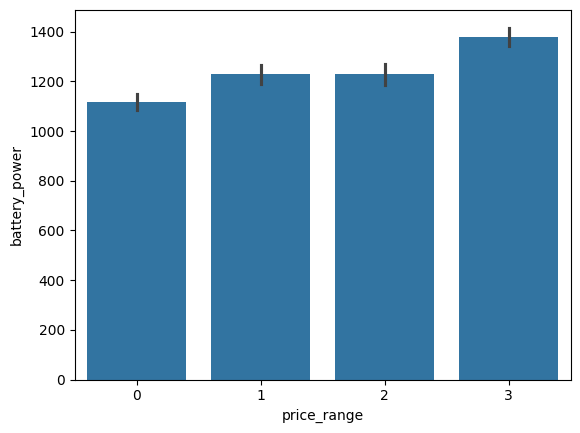

In [14]:

sns.barplot(data=df,y='battery_power',x='price_range')
plt.show()

Mid range and high mid range phone offers good battery Power

**2.** **Ram - Price Range**

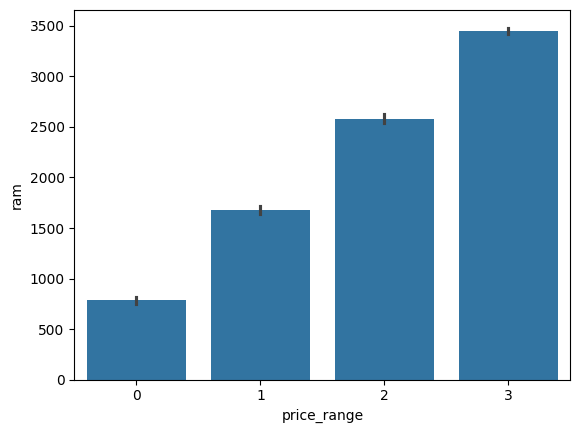

In [15]:
sns.barplot(data=df,y='ram',x='price_range')
plt.show()

Very high price range smartphones provides high ram

**3.** **Memory - Price Range**

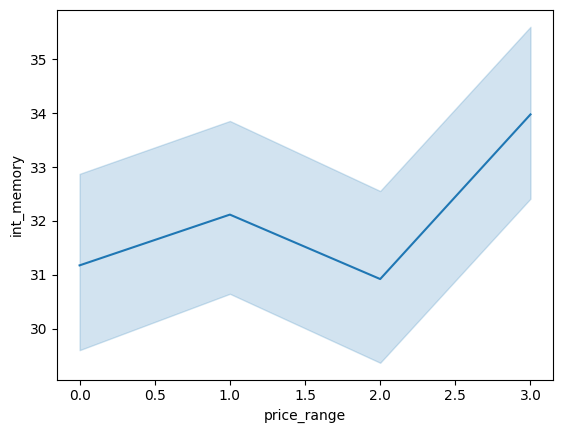

In [16]:
sns.lineplot(data=df,x='price_range',y='int_memory')
plt.show()

Low and high mid range smartphones provides same type of specification in terms of internal memory however high range smartphones packed with the good memory.

**4. Front mega pixel - price range**

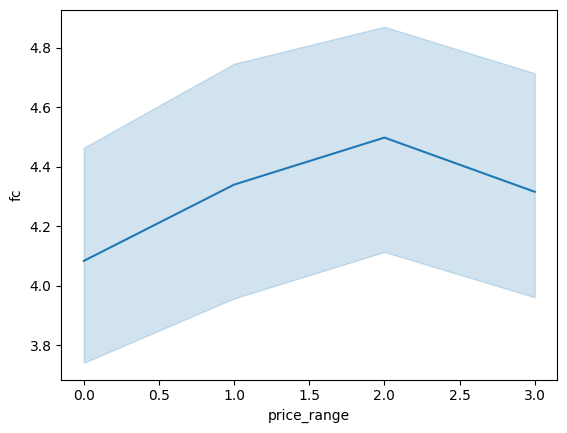

In [17]:
sns.lineplot(data=df,x='price_range',y='fc')
plt.show()

Expensive phones and mid range phone offer same specs in terms of front mega pixels camera but high mid range phones offers high quality front camera

**5.** **How many 3g phones** **and 4g phones**

<Axes: xlabel='three_g', ylabel='count'>

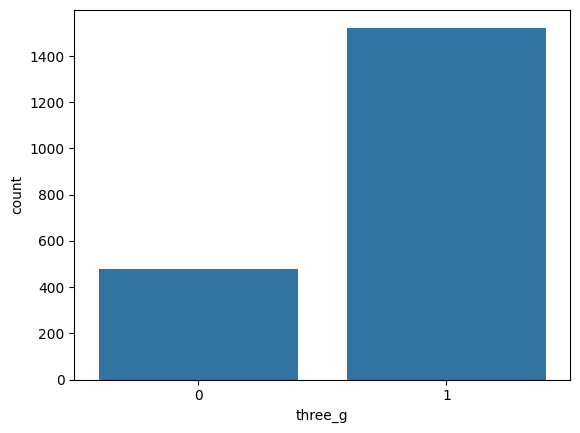

In [18]:
sns.countplot(data=df,x='three_g')

In [19]:
df['three_g'].value_counts()

three_g
1    1523
0     477
Name: count, dtype: int64

<Axes: xlabel='four_g', ylabel='count'>

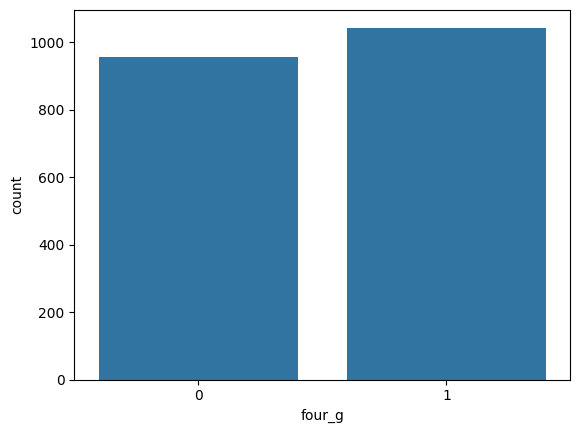

In [20]:
sns.countplot(data=df,x='four_g')

In [21]:
df['four_g'].value_counts()

four_g
1    1043
0     957
Name: count, dtype: int64

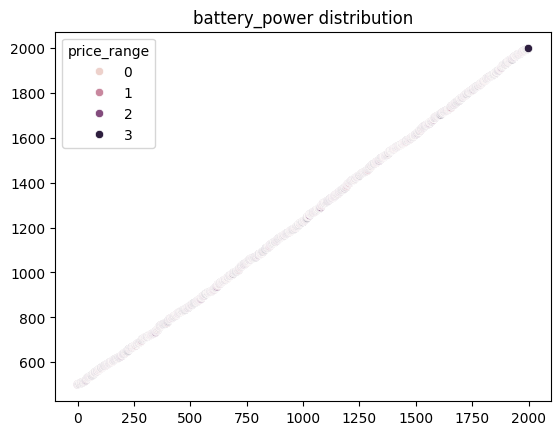

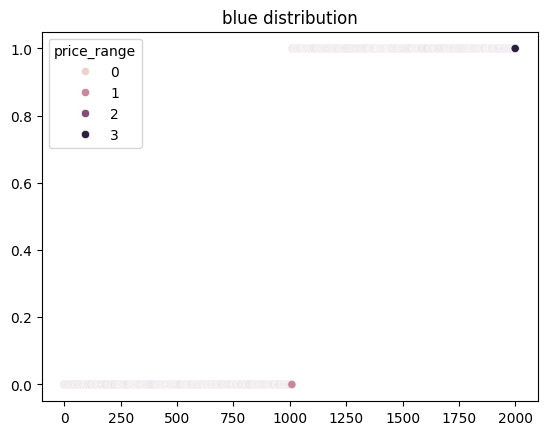

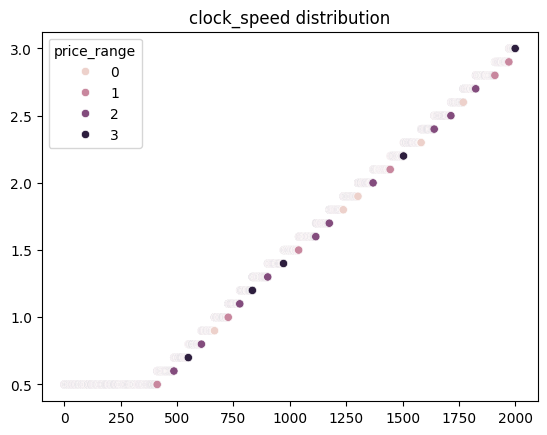

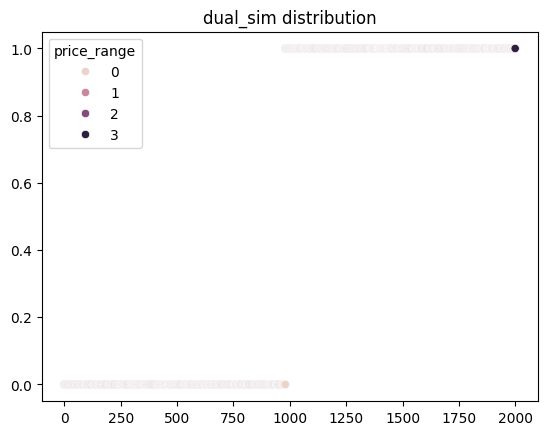

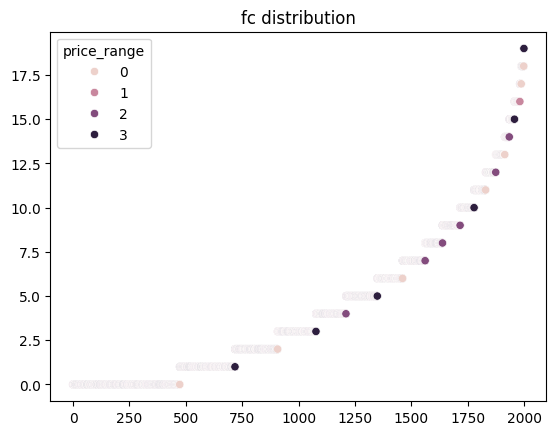

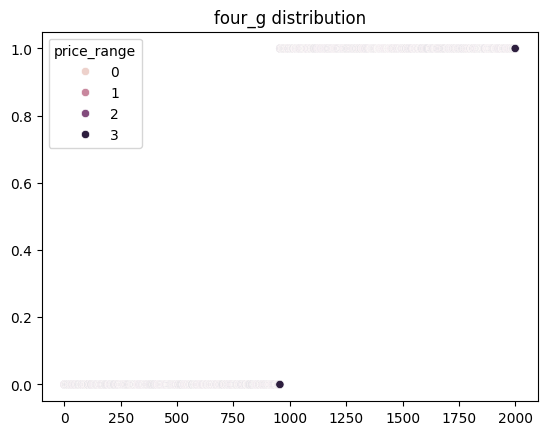

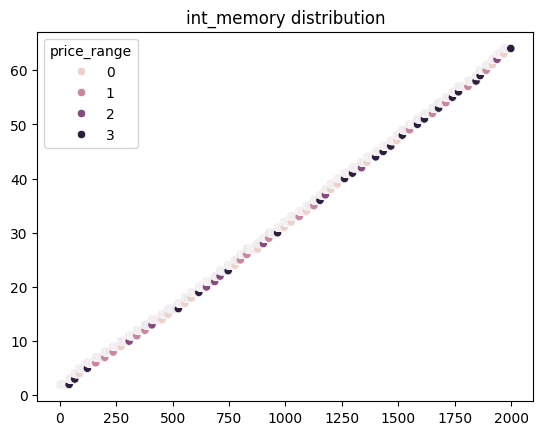

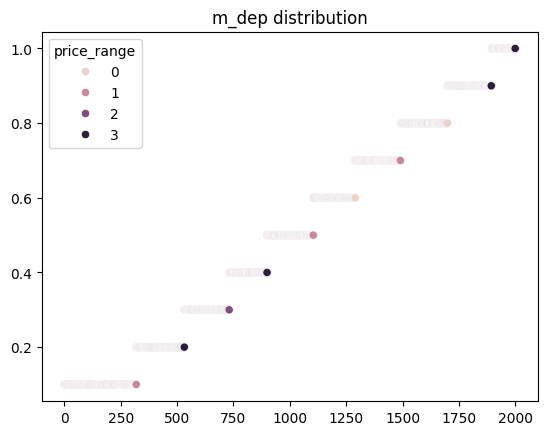

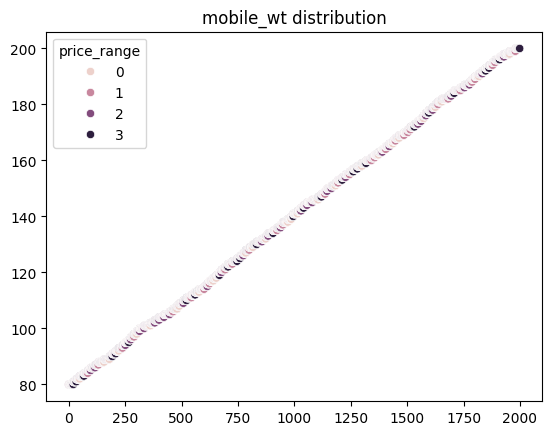

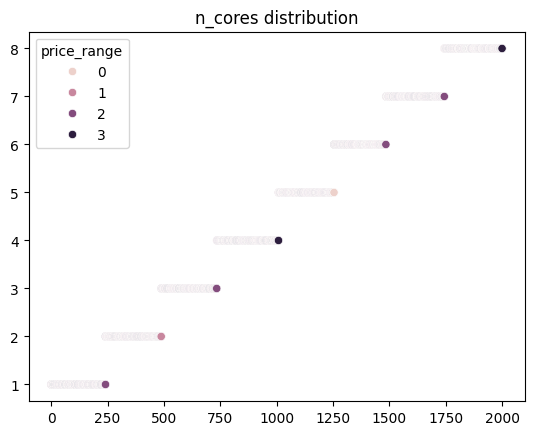

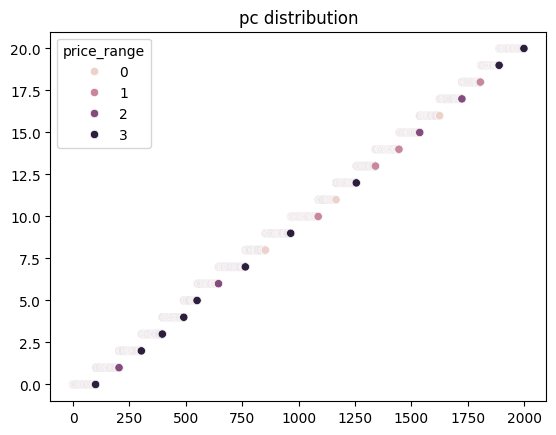

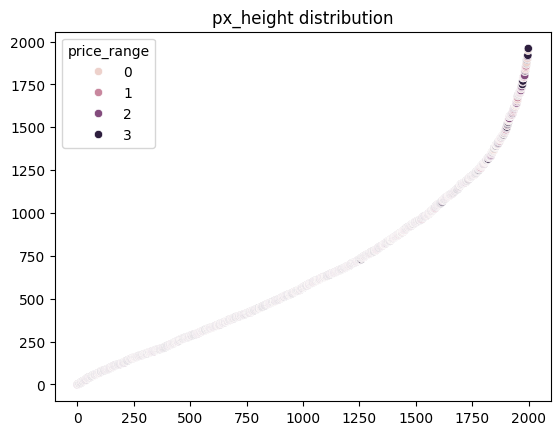

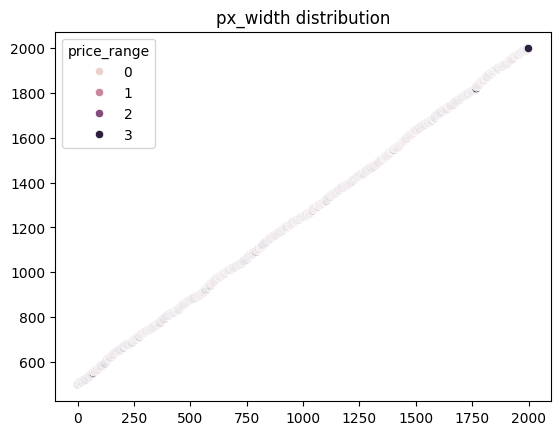

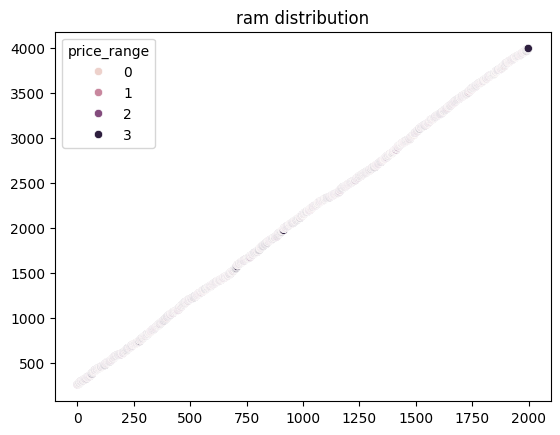

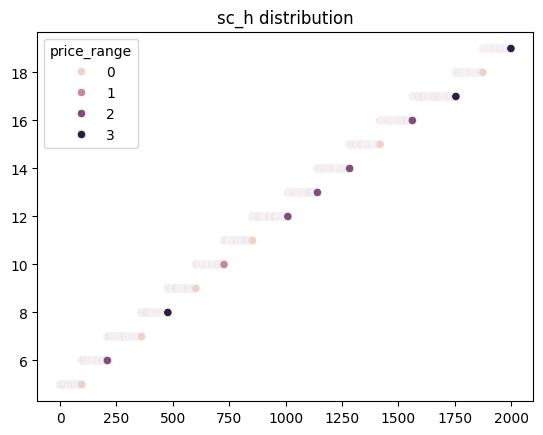

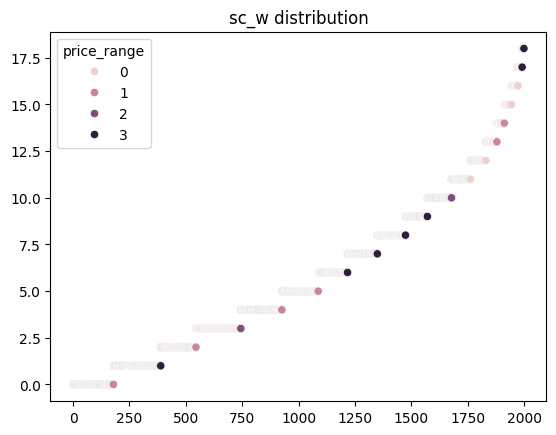

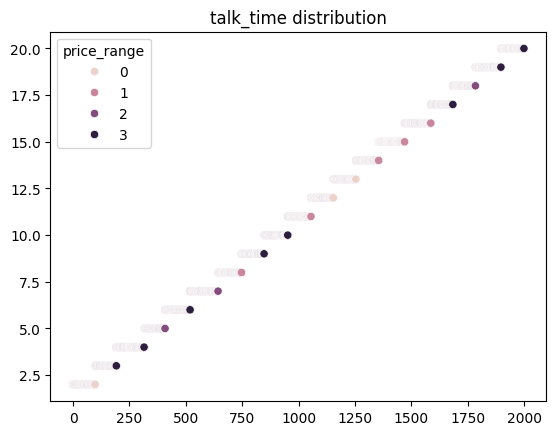

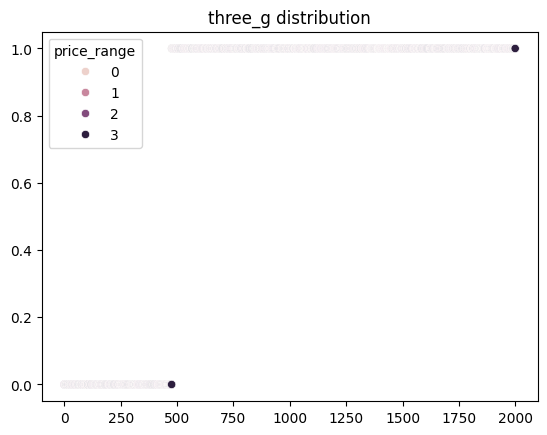

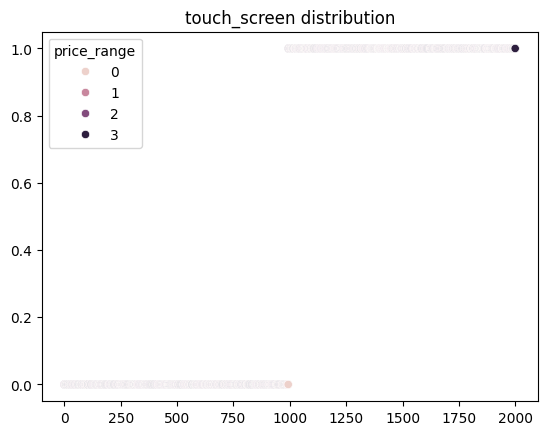

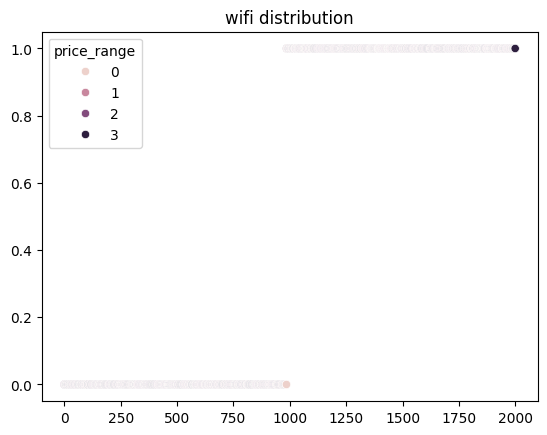

In [22]:
#checking outliers
for i in (df.describe().columns[:-1]):
  sns.scatterplot(df,x=range(len(df[i])),y=np.sort(df[i]),hue='price_range')
  plt.title(i+' distribution')
  plt.show()



in this data we can see that there is very low outilers in the data.

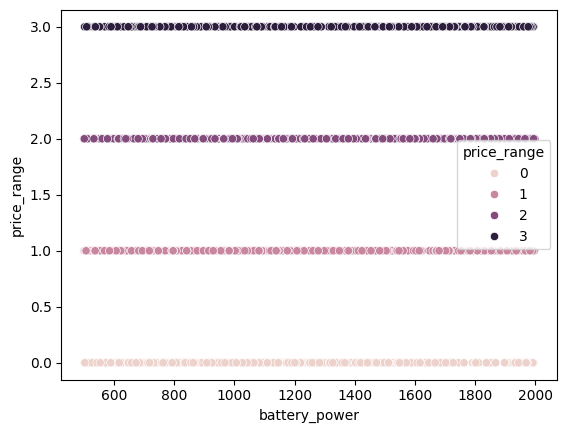

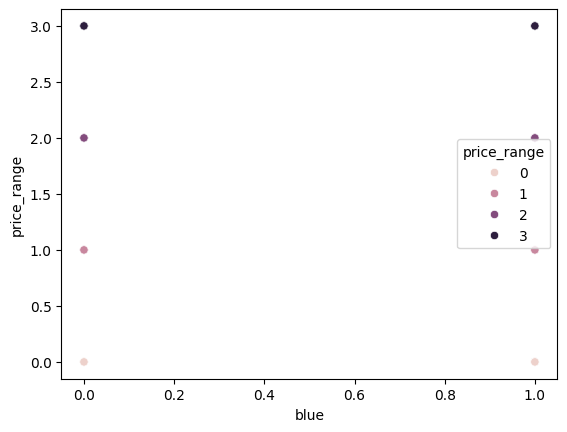

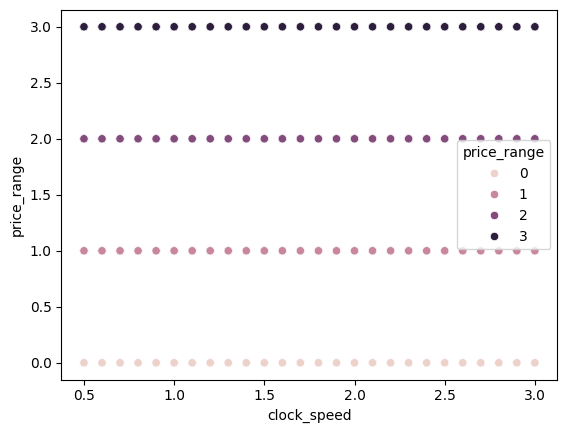

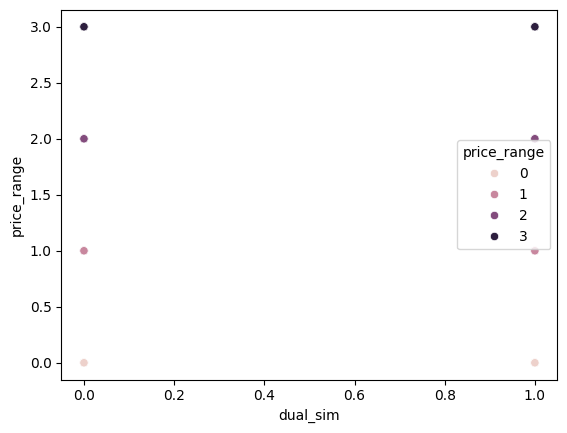

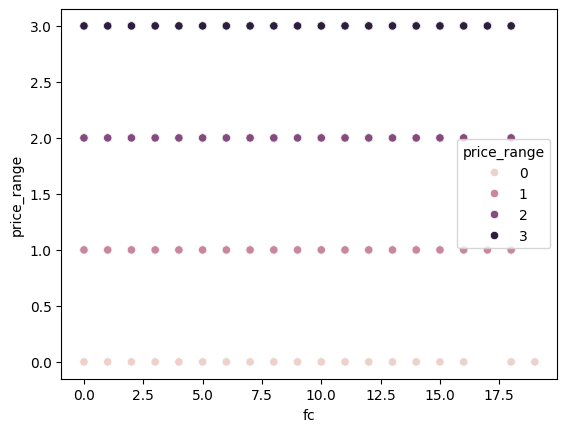

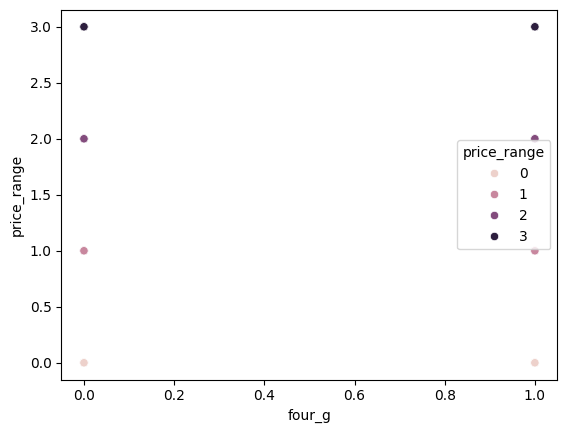

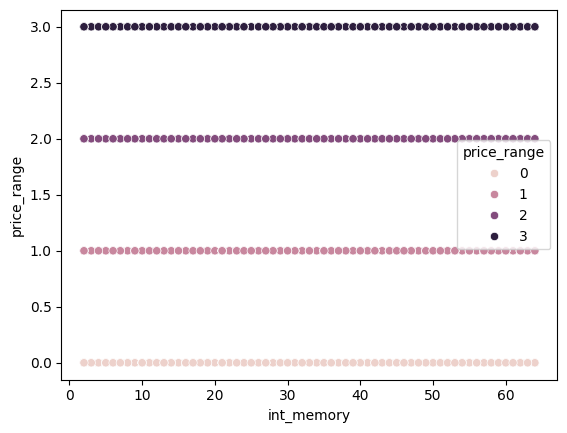

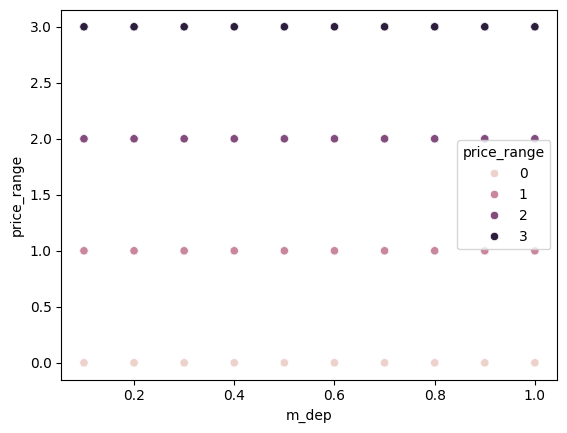

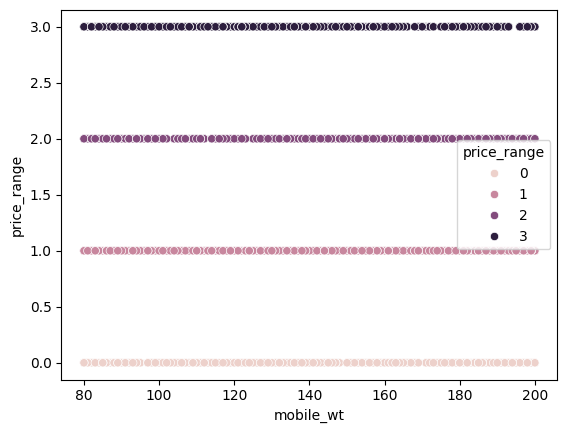

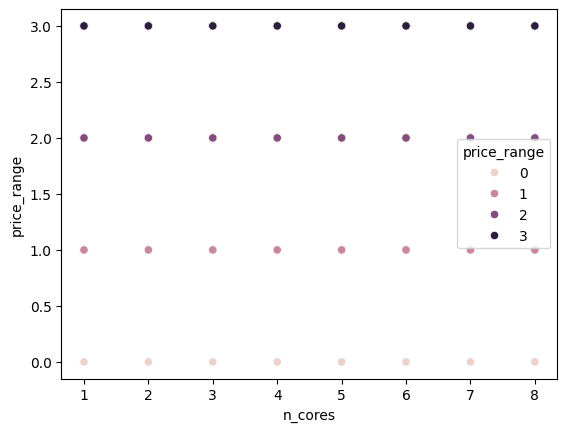

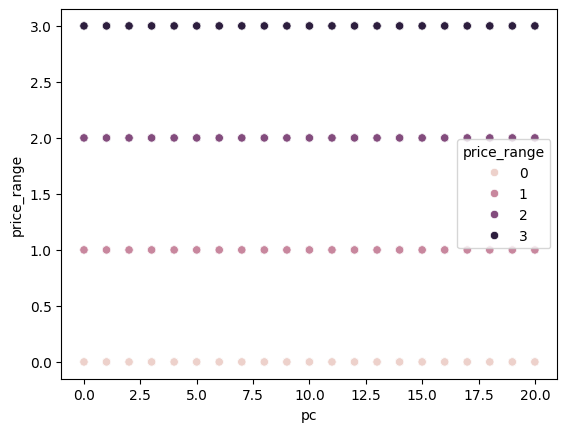

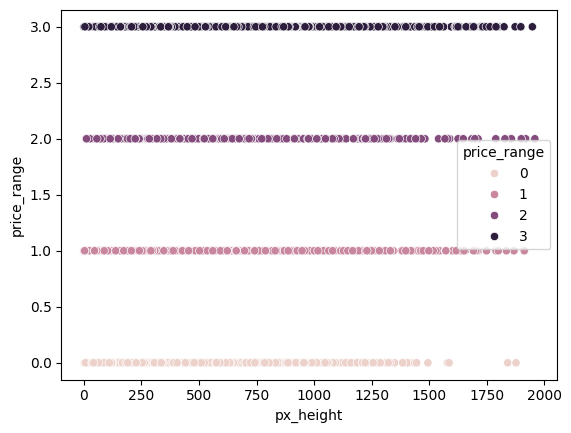

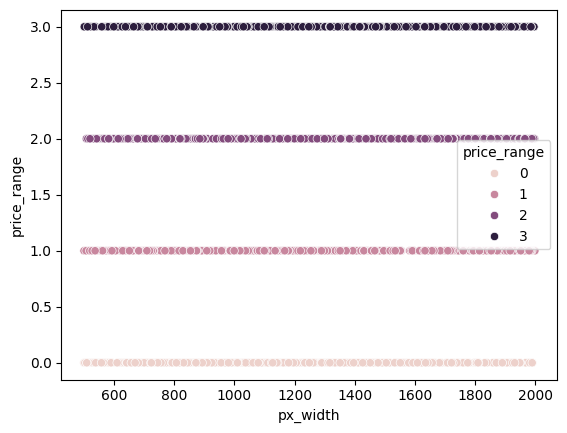

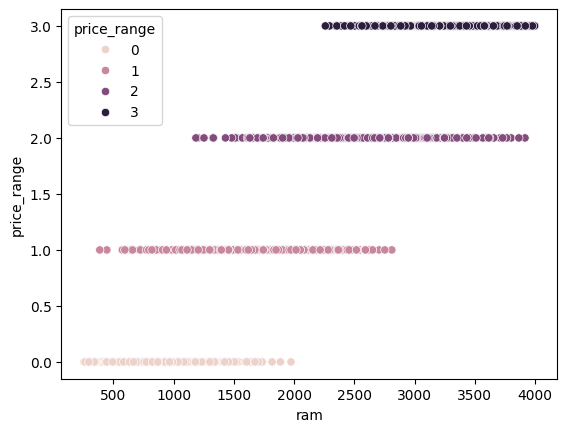

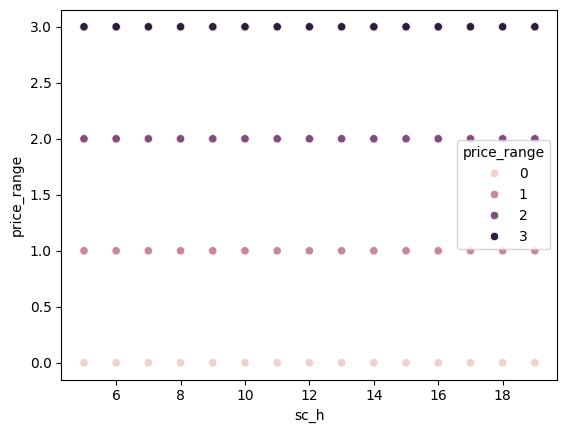

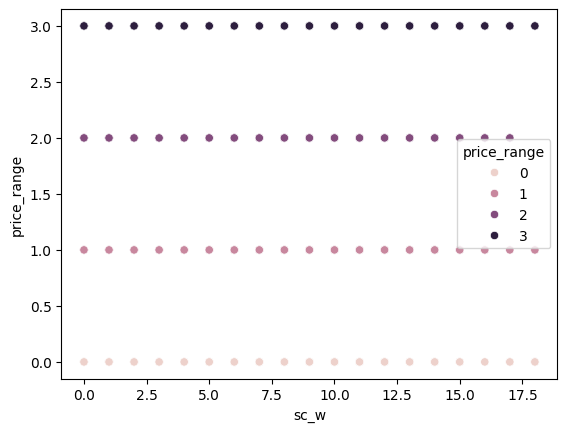

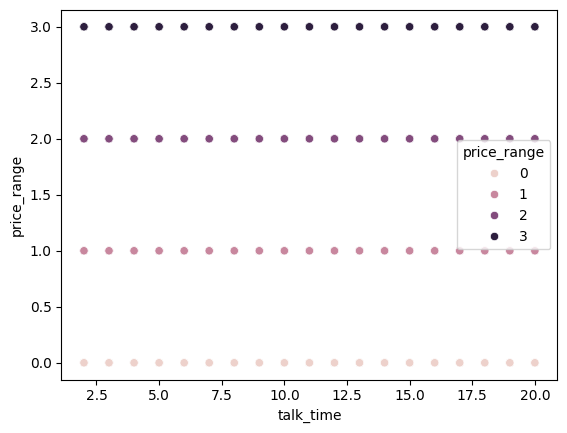

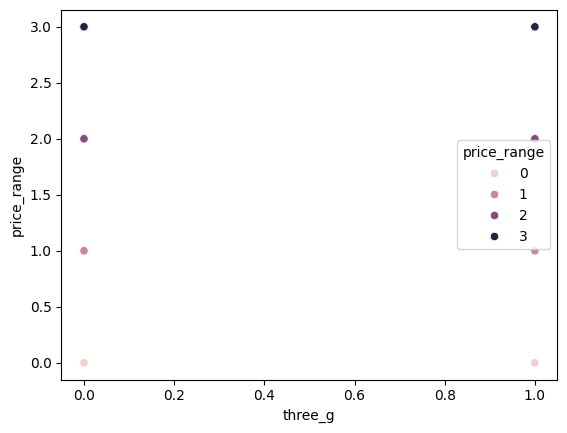

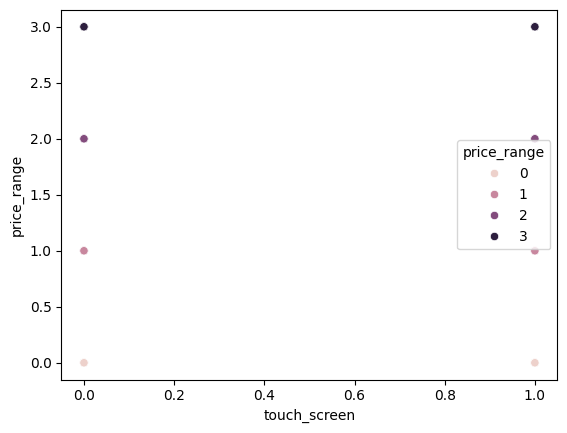

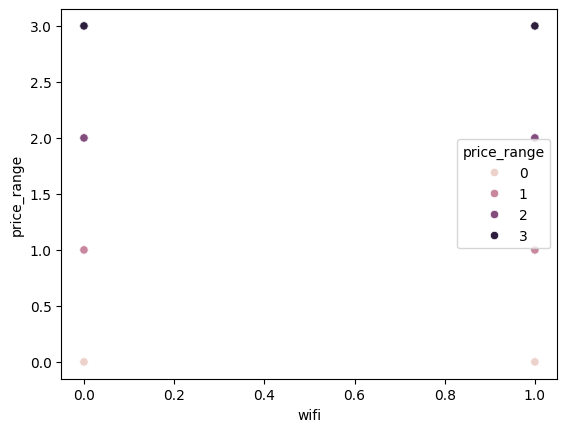

In [23]:
#Checked the relationship between independent and dependent variable.
for i in df.describe().columns[:-1]:
   sns.scatterplot(df,x=i,y=df.describe().columns[-1],hue='price_range')
   plt.show()

# Feature Engineering

**check multicollinearity**

<function matplotlib.pyplot.show(close=None, block=None)>

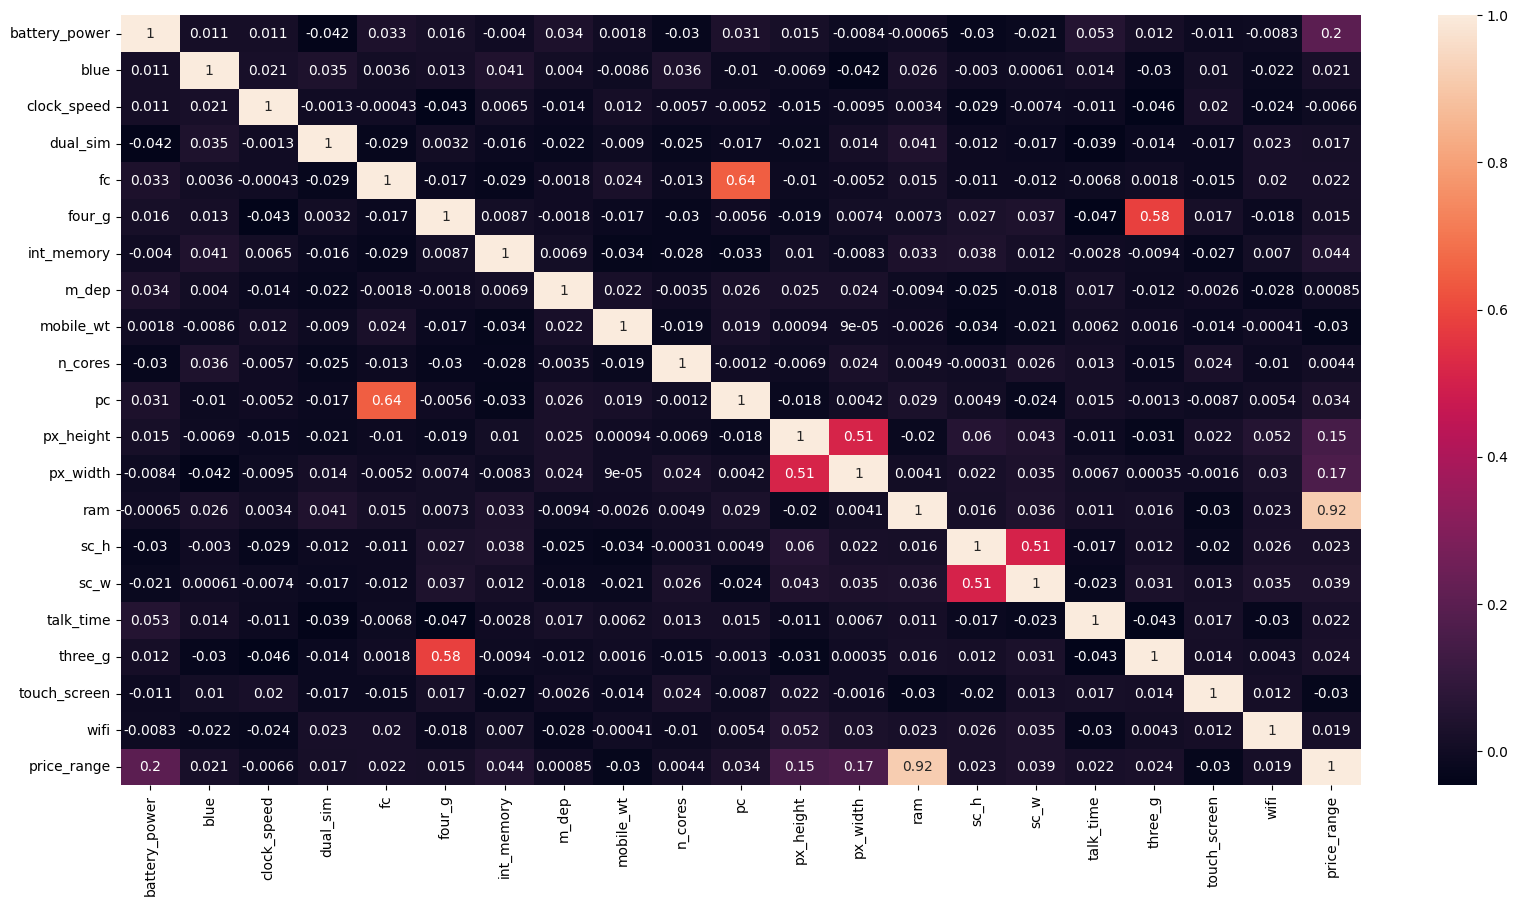

In [24]:
#multicollinearity
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show

after analysing heat map,no independent variable are highly correlated except ram

In [25]:
#Created a feature by combining px_height and px_width, hence we dropped both features.
df['Pixels Dimension']=df['px_height']*df['px_width']

df.drop(columns=['px_height','px_width'],inplace=True)

In [26]:
#Using function converted MB into GB.
def change(x):
  return x/1000

In [27]:
#Applied the above function
df['ram']=df['ram'].apply(change)

In [28]:
# 3G will work on 4G phones, but 4G won't work on 3G phones
df.drop(columns=['three_g'],inplace=True)

In [29]:
#Since most of the smartphones comes with bluetooth feature, hence we dropped Bluetooth feature.
df.drop(columns=['blue'],inplace=True)

In [30]:
#Created a feature by combining sc_h and sc_w, hence we dropped both features.
df['Screen Dimension'] = df['sc_h']* df['sc_w']
df.drop(columns=['sc_h','sc_w'],inplace=True)

In [31]:
df.shape

(2000, 17)

In [32]:
#Defined price_range as dependent variable and rest all the features as independent variable
dependent_variable ='price_range'
independent_varaible = list(set(df.columns.tolist())-{dependent_variable})

In [33]:
# stored the independent and dependent values in x and y variable respectively
x=df[independent_varaible].values
y=df[dependent_variable].values

In [34]:
# split the data into 4 parts x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

**Feature scalling**

In [35]:
#Created an object for StandardScaler
stand = StandardScaler()

In [36]:
#Scalling
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)

#Model Implementation

# **check overfitting**

In [37]:
# A function to check overfitting using learning curve
def check_overfit(model_name):
  train_sizes,train_scores,test_scores = learning_curve(model_name,x_train,y_train,cv=5)
  train_scores_mean = np.mean(train_scores,axis=1)
  test_scores_mean = np.mean(test_scores,axis=1)
  plt.plot(train_sizes,train_scores_mean,label='Training score')
  plt.plot(train_sizes,test_scores_mean,label='Test score')

  plt.title("learning curve")
  plt.xlabel("training set size")
  plt.ylabel("Accuracy score")
  plt.legend(loc='best')
  plt.show()


# **MODEL-1 DECISION TREE**

In [38]:
# created an object for decision tree classifier and then fit the train dataset into this model.
dec =DecisionTreeClassifier()
dec.fit(x_train,y_train)



DecisionTreeClassifier()

In [39]:
#Predicting the model and checking the accuracy of the model
dec_pred = dec.predict(x_test)
dec_pred_accuracy = accuracy_score(dec_pred,y_test)
print(dec_pred_accuracy)

0.844


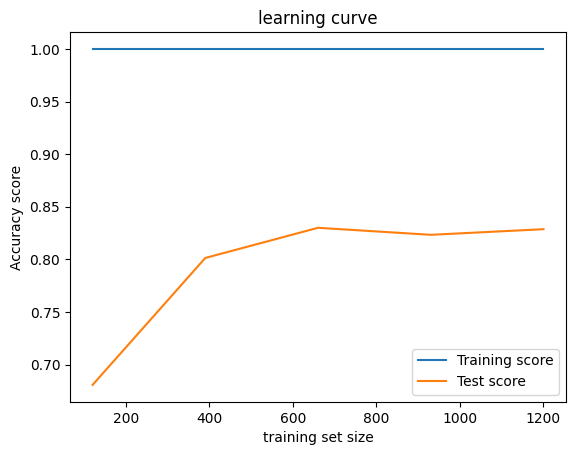

In [40]:
#learning curve
check_overfit(dec)

# DECISION TREE(PRE PRUNNING)

In [41]:
#Set the parameters in the model
param_grid=param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [10, 20],
    'min_impurity_decrease': [0, 0.1, 0.2]
}

In [42]:
#hyperparameter tunning using GridSearchCV
pre_dec = DecisionTreeClassifier()
pre_dec = GridSearchCV(pre_dec,param_grid=param_grid,scoring='accuracy',cv=5)
pre_dec.fit(x_train,y_train)
pre_dec_pred = pre_dec.predict(x_test)
pre_dec_accuracy = accuracy_score(pre_dec_pred,y_test)
pre_dec_accuracy

0.832

In [43]:
#Got the best parameter through hyperparameter tunning
pre_dec.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [44]:
#Set the best parameter in this model
dec =DecisionTreeClassifier(criterion='gini',
 max_depth= 10,
 max_leaf_nodes= 20,
 min_impurity_decrease= 0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best')
dec.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, min_impurity_decrease=0)

In [45]:
#Predicting the model and checking accuracy after hyperparameter tunning
dec_pred = dec.predict(x_test)
dec_pred_accuracy = accuracy_score(dec_pred,y_test)
print(dec_pred_accuracy)

0.832


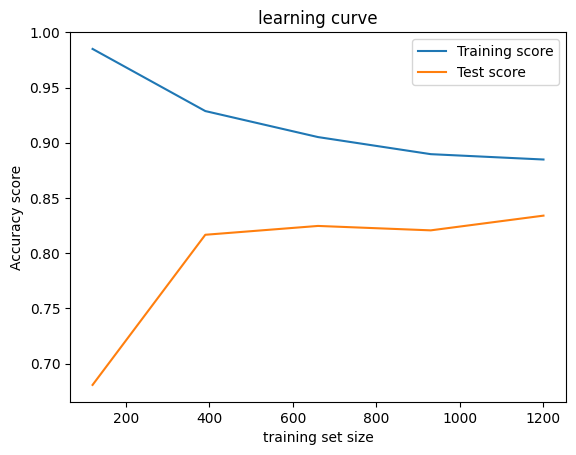

In [46]:
#Model is performing well after hyperparameter tunning.
check_overfit(dec)

# **Model-2 RANDOM FOREST**

In [47]:
#Created an object for Random forest classifier, then trained the model and checking the accuracy of the model.
rf_tune = RandomForestClassifier(max_depth= 15,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 200)
rf_tune.fit(x_train,y_train)
rf_tune_pred = rf_tune.predict(x_test)
rf_tune_accuracy = accuracy_score(rf_tune_pred,y_test)
rf_tune_accuracy

0.902

# **MODEL -3 (K NEAREST NEIGHBORS)**

In [48]:
#find the value of k.
error=[]
for i in range(1,1000):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  knn_pred = knn.predict(x_test)
  error.append(np.mean(knn_pred!=y_test))

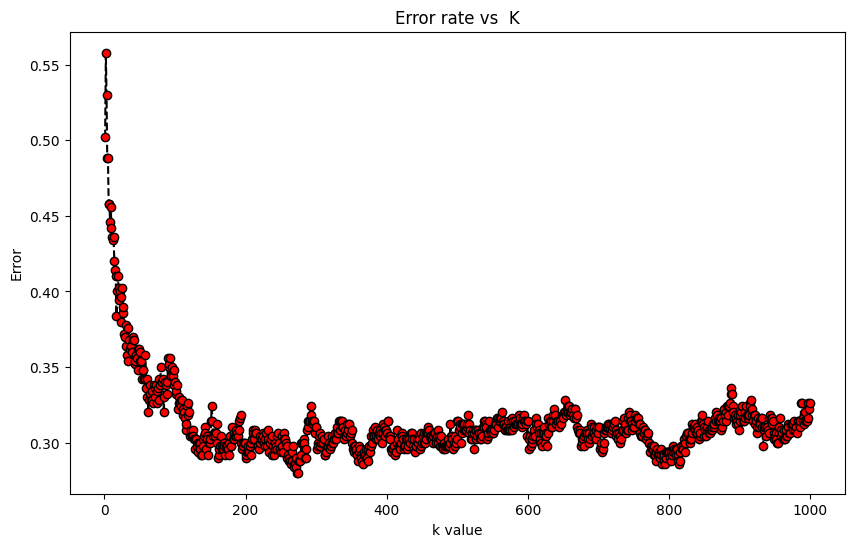

minimum error  0.28 at the value of k = 273


In [49]:
#Plotting line plot.
plt.figure(figsize=(10,6))
plt.plot(range(1,1000),error,color='black',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('Error rate vs  K')
plt.xlabel('k value')
plt.ylabel('Error')
plt.show()
print("minimum error ",min(error),"at the value of k =",error.index(min(error))+1)

In [50]:
#Created an object for KNN.
knn = KNeighborsClassifier(n_neighbors=273,p=1,weights='distance',metric= 'manhattan')

In [51]:
# Trained the model
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=273, p=1,
                     weights='distance')

In [52]:
#Model Prediction
knn_pred = knn.predict(x_test)

In [53]:
#Checking accuracy
knn_accuracy = accuracy_score(knn_pred,y_test)
knn_accuracy

0.78

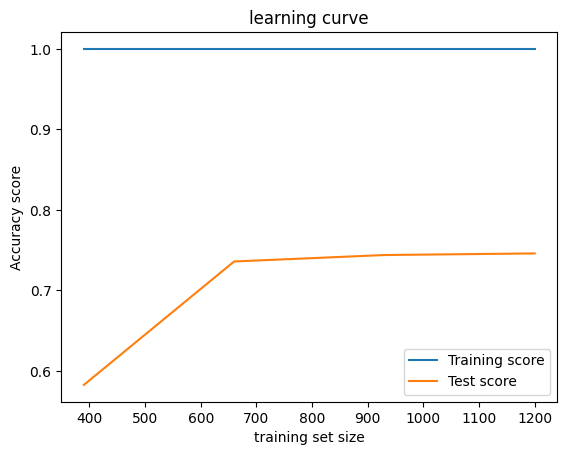

In [54]:
#Learning Curve
check_overfit(knn)

# **MODEL-4 LOGISTIC REGRESSION**

In [55]:
#Set the parameters in the model
parameter = {'penalty':['l1', 'l2', 'elasticnet'],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],'C':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10]}

In [56]:
#hyperparameter tuning in the model
logi = LogisticRegression()
logi = GridSearchCV(logi,param_grid=parameter,scoring='accuracy',cv=5)

In [57]:
#Trained the model
logi.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [58]:
#Got the best parameter
logi.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [59]:
#Applied best parameter
logi_tune = LogisticRegression(C= 1, penalty= 'l1', solver= 'saga')

In [60]:
#Trained the using best parameters
logi_tune.fit(x_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='saga')

In [61]:
#Predicting the model and checked the accuracy of the model
logi_tune_pred = logi_tune.predict(x_test)
logi_tune_accuracy = accuracy_score(logi_tune_pred,y_test)
logi_tune_accuracy

0.948

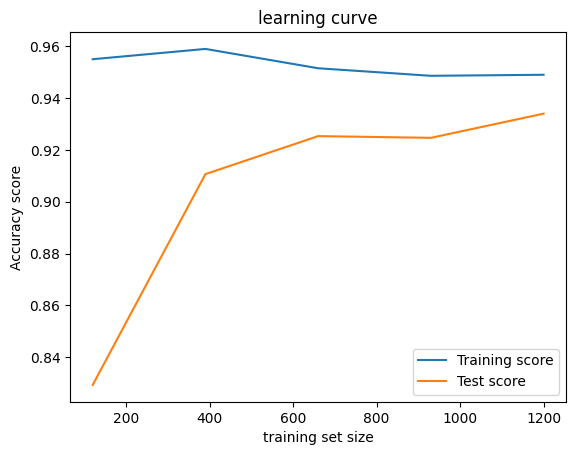

In [62]:
#Learning Curve
check_overfit(logi_tune)

# **Model-5** **Naive Bayes**

In [63]:
#Created an object for GaussianNB
nb=GaussianNB()

In [64]:
#Trained the model
nb.fit(x_train,y_train)

GaussianNB()

In [65]:
#Model Prediction
nb_pred = nb.predict(x_test)

In [66]:
#Checked the accuracy of the model
nb_accuracy = accuracy_score(nb_pred,y_test)
nb_accuracy

0.804

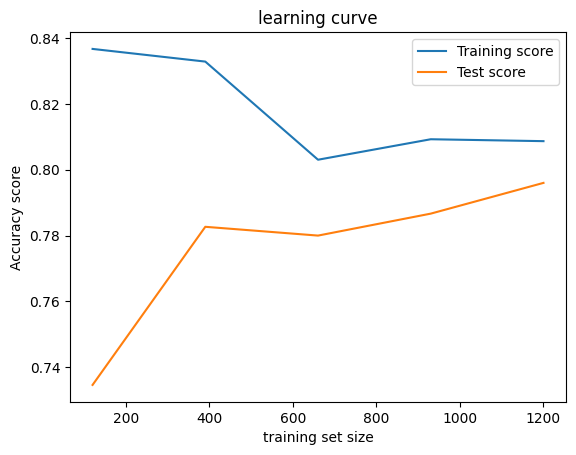

In [67]:
#Learning Curve
check_overfit(nb)

# **Model-6** **XgBoost**

In [68]:
#Set the parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
  "min_child_weight" : [ 1, 3, 5, 7 ],
  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

 }

In [73]:
#Hyperparameter tunning and trained the model
xgb= XGBClassifier()


random_search= RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy', verbose=3)

In [74]:
#Got the best parameters
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [75]:
#Best Estimator
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [76]:
#Model prediction
xgb_pred = random_search.predict(x_test)

In [77]:
#Checked the accuracy
xg_boost_accuracy = accuracy_score(xgb_pred,y_test)

In [ ]:
xg_boost_accuracy

0.892

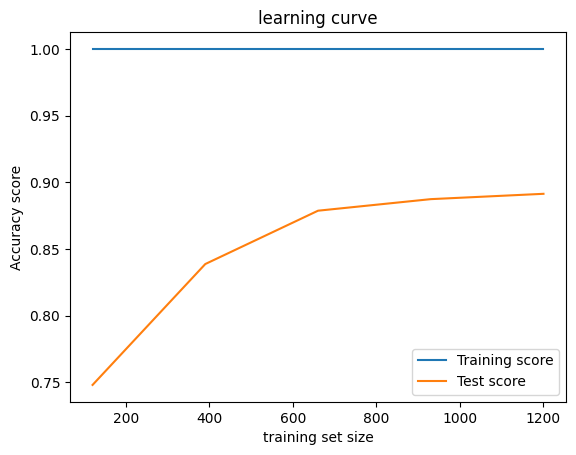

In [78]:
#Learning Curve
check_overfit(xgb)

# **Model -7 Support Vector Machine**

In [69]:
#Set the parameters
svc_params = {'C':range(5,10,2),
              'kernel':['rbf','linear', 'poly', 'sigmoid',]}

In [79]:
#Hyperparameter tunning and trained the model
svc_cv  = GridSearchCV(SVC(),param_grid=svc_params,cv=5,verbose=True,scoring='accuracy',n_jobs=-1)
svc_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(5, 10, 2),
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=True)

In [80]:
#got best parameters
svc_cv.best_params_

{'C': 5, 'kernel': 'linear'}

In [81]:
#Trained the model after using best parameters
scv =SVC(C=5,kernel='linear')
scv.fit(x_train,y_train)

SVC(C=5, kernel='linear')

In [82]:
#Model prediction
scv_pred = scv.predict(x_test)

In [83]:
#Checked the accuracy of the model
scv_accuracy = accuracy_score(scv_pred,y_test)

In [84]:
scv_accuracy

0.942

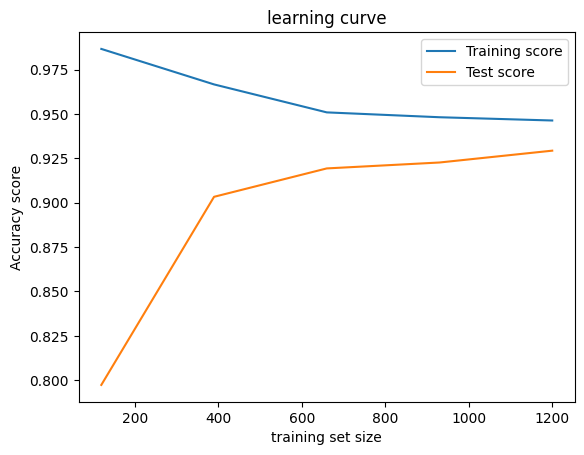

In [85]:
#Learning curve
check_overfit(scv)

# **Model-8 Stacking**

In [95]:
#Set base models and final estimator
estimators = [('gbc',GradientBoostingClassifier()),('xgb',XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=15,
              min_child_weight=3, objective='multi:softprob')),
       ('bc',BaggingClassifier(base_estimator= SVC(C= 5, kernel= 'linear'),
 bootstrap= True,
 bootstrap_features= True,
 max_features= 1.0,
 max_samples= 0.8,
 n_estimators= 20))]

In [96]:
#Hyper parameter tunning
sc= StackingClassifier(estimators=estimators,passthrough=True,n_jobs=-1)

In [97]:
#Trained the model
sc.fit(x_train,y_train)

StackingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.3,
                                              grow_policy=None,
                                              importance_type=None,
                                              int...
                                              max_delta_step=None, max_depth=15,
                                              max_leaves=None,
                                              min_child_weight=3, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)),
                               ('bc',
                                BaggingClassifier(base_estimator=SVC(C=5,
                                                                     kernel='linear'),
                                                  bootstrap_features=True,
                                                  max_samples=0.8,
                                                  n_estimators=20))],
                   n_jobs=-1, passthrough=True)

In [98]:
#Model prediction
sc_pred = sc.predict(x_test)

In [99]:
#Checked accuracy
sc_accuracy=accuracy_score(sc_pred,y_test)

In [100]:
sc_accuracy

0.944

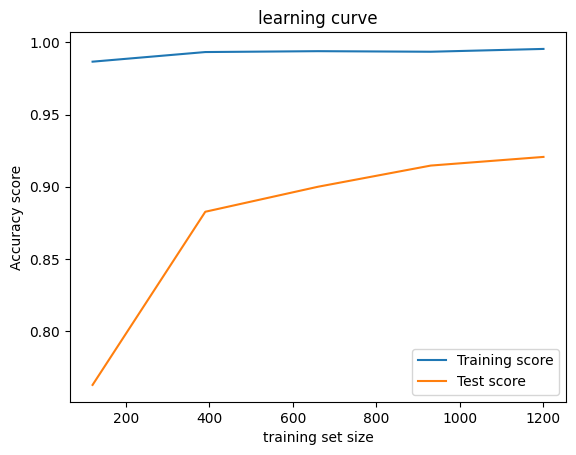

In [101]:
#Learning Curve
check_overfit(sc)

#Evaluation

In [102]:
#set all the accuracy in data frame
evaluation = pd.DataFrame(data={'Model':['KNN classifier','DecisionTree classifier','LogisticRegression classifier','RandomForest classifier','Naive Bays','xgboost','Support Vector Machine','Stacking'], 'accuracy':[knn_accuracy,dec_pred_accuracy,logi_tune_accuracy,rf_tune_accuracy,nb_accuracy,xg_boost_accuracy,scv_accuracy,sc_accuracy]})


In [103]:
#sorting
evaluation=evaluation.sort_values(by=['accuracy'],ascending=False).reset_index(drop=True)

In [104]:
evaluation

,Model,accuracy
0,LogisticRegression classifier,0.948
1,Stacking,0.944
2,Support Vector Machine,0.942
3,xgboost,0.908
4,RandomForest classifier,0.902
5,DecisionTree classifier,0.832
6,Naive Bays,0.804
7,KNN classifier,0.780


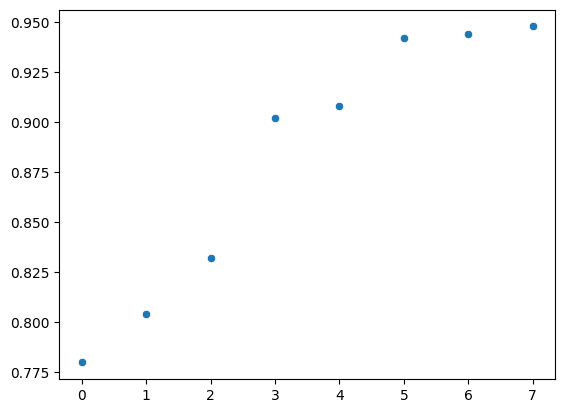

In [105]:
#plot the scatter
sns.scatterplot(x=range(len(evaluation['accuracy'])),y=np.sort(evaluation['accuracy']))
plt.show()

In [106]:
# confusion_matrix
def conf(x,y):
  sns.heatmap(confusion_matrix(x,y_test),annot=True)
  plt.title(y)
  plt.show()

def classi(x,y):
  print(y)
  print(classification_report(x,y_test))

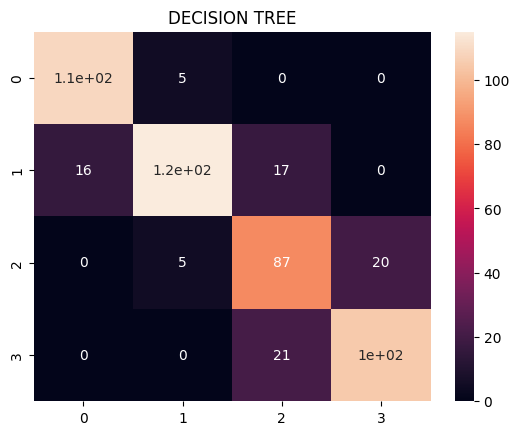

In [107]:
conf(pre_dec_pred,'DECISION TREE')


In [108]:
classi(pre_dec_pred,'DECISION TREE')

DECISION TREE
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       114
           1       0.92      0.78      0.84       148
           2       0.70      0.78      0.73       112
           3       0.84      0.83      0.84       126

    accuracy                           0.83       500
   macro avg       0.83      0.84      0.83       500
weighted avg       0.84      0.83      0.83       500



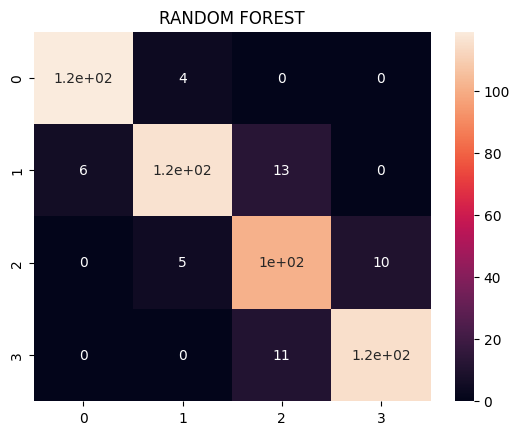

In [109]:
conf(rf_tune_pred,'RANDOM FOREST')

In [110]:
classi(rf_tune_pred,'RANDOM FOREST')

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       123
           1       0.93      0.86      0.89       135
           2       0.81      0.87      0.84       116
           3       0.92      0.91      0.92       126

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



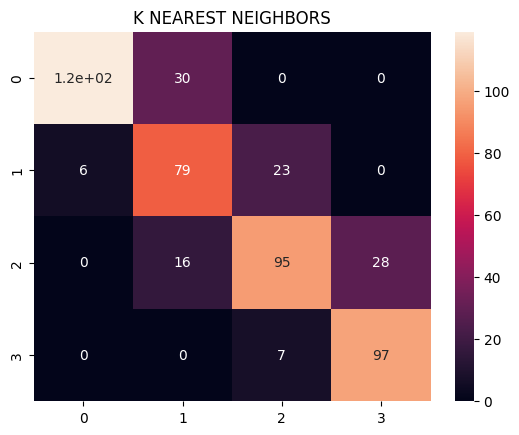

In [111]:
conf(knn_pred,'K NEAREST NEIGHBORS')

In [112]:
classi(knn_pred,'K NEAREST NEIGHBORS')

K NEAREST NEIGHBORS
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       149
           1       0.63      0.73      0.68       108
           2       0.76      0.68      0.72       139
           3       0.78      0.93      0.85       104

    accuracy                           0.78       500
   macro avg       0.78      0.79      0.78       500
weighted avg       0.79      0.78      0.78       500



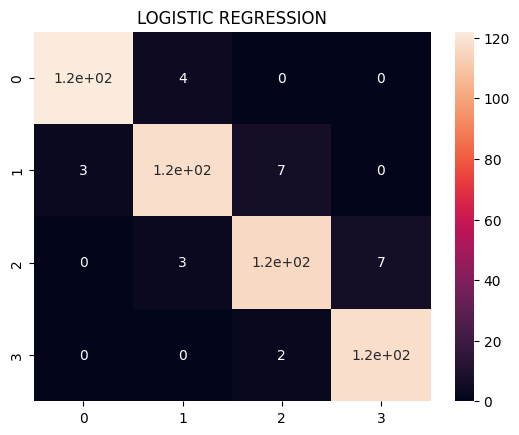

In [113]:
conf(logi_tune_pred,'LOGISTIC REGRESSION')

In [114]:
classi(logi_tune_pred,'LOGISTIC REGRESSION')

LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       126
           1       0.94      0.92      0.93       128
           2       0.93      0.92      0.92       126
           3       0.94      0.98      0.96       120

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



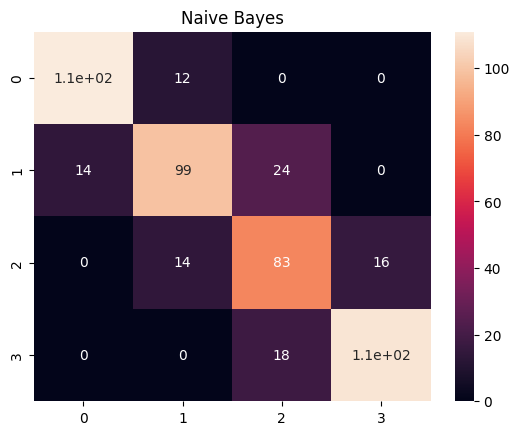

In [115]:
conf(nb_pred,'Naive Bayes')

In [116]:
classi(nb_pred,'Naive Bayes')

Naive Bayes
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       123
           1       0.79      0.72      0.76       137
           2       0.66      0.73      0.70       113
           3       0.87      0.86      0.87       127

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.81      0.80      0.80       500



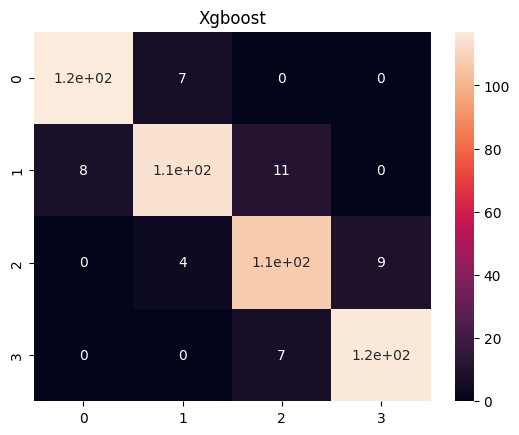

In [117]:
conf(xgb_pred,'Xgboost')

In [118]:
classi(xgb_pred,'Xgboost')

Xgboost
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       0.91      0.86      0.88       133
           2       0.86      0.89      0.87       120
           3       0.93      0.94      0.94       123

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



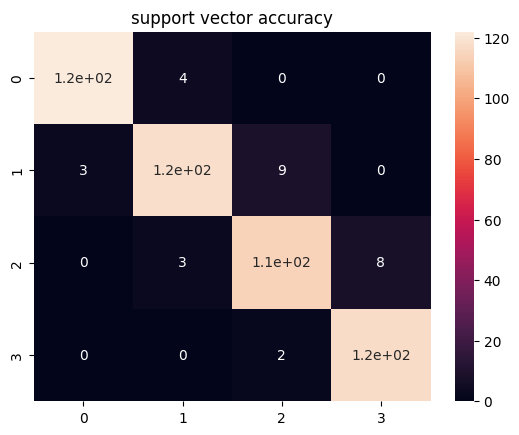

In [119]:
conf(scv_pred,'support vector accuracy')

In [120]:
classi(scv_pred,'support vector accuracy')

support vector accuracy
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       126
           1       0.94      0.91      0.93       130
           2       0.91      0.91      0.91       125
           3       0.94      0.98      0.96       119

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



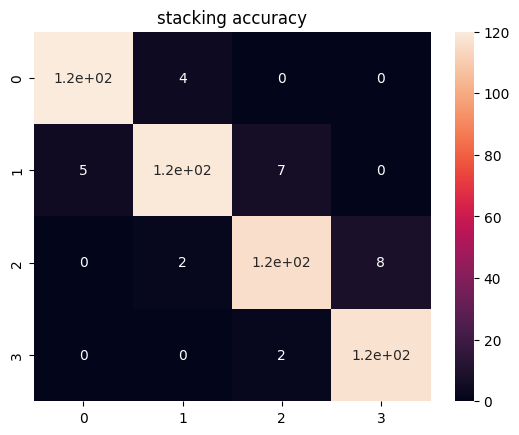

In [121]:
conf(sc_pred,'stacking accuracy')

In [122]:
classi(sc_pred,'stacking accuracy')

stacking accuracy
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       124
           1       0.95      0.91      0.93       131
           2       0.93      0.92      0.92       126
           3       0.94      0.98      0.96       119

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



# Model Explainability

In [123]:
# feature importance
features = independent_varaible
importances = rf_tune.feature_importances_
indices = np.argsort(importances)

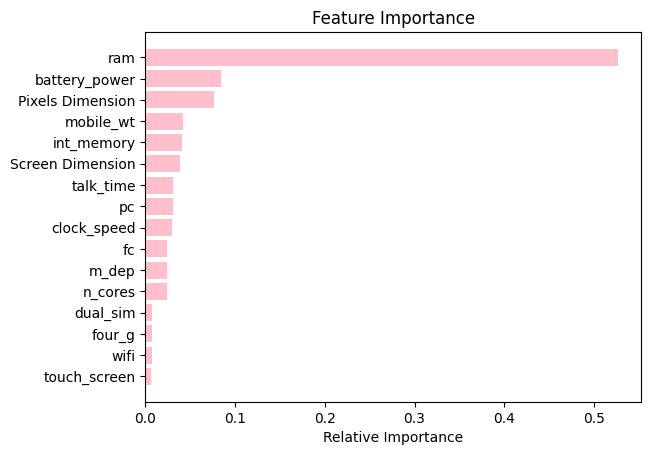

In [124]:
# plot the graph
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


In [125]:
# new dataframe with important features
new_df = df[['ram','battery_power','Pixels Dimension','mobile_wt','int_memory','Screen Dimension','talk_time','pc','clock_speed','fc','price_range']]

In [126]:
new_df.head()

,ram,battery_power,Pixels Dimension,mobile_wt,int_memory,Screen Dimension,talk_time,pc,clock_speed,fc,price_range
0,2.549,842,15120,188,7,63,19,2,2.2,1,1
1,2.631,1021,1799140,136,53,51,7,6,0.5,0,2
2,2.603,563,2167308,145,41,22,9,6,0.5,2,2
3,2.769,615,2171776,131,10,128,11,9,2.5,0,2
4,1.411,1821,1464096,141,44,16,15,14,1.2,13,1


In [127]:
new_df.shape

(2000, 11)

In [128]:
dependent_variable ='price_range'
independent_varaible = list(set(new_df.columns.tolist())-{dependent_variable})

In [129]:
x=new_df[independent_varaible].values
y=new_df[dependent_variable].values

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [131]:
stand = StandardScaler()
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)


In [132]:
vb = StackingClassifier(estimators=estimators,passthrough=True,n_jobs=-1)
vb.fit(x_train,y_train)
vb_pred = vb.predict(x_test)
vb_accuracy = accuracy_score(vb_pred,y_test)
vb_accuracy


0.94

In [133]:
vb.predict(x_train)

array([2, 3, 1, ..., 3, 0, 0])

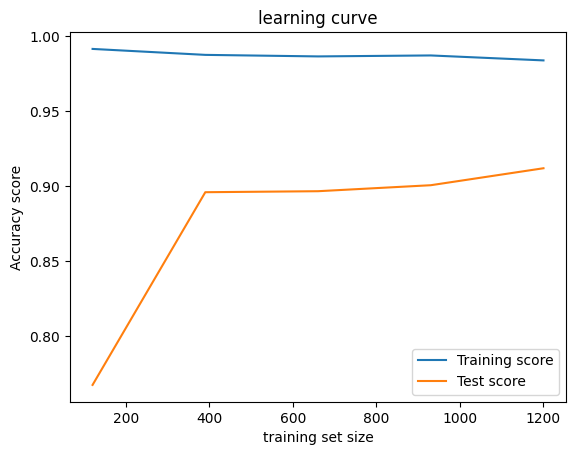

In [134]:
check_overfit(vb)

In [135]:
print(classification_report(vb_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       123
           1       0.91      0.93      0.92       122
           2       0.91      0.88      0.90       129
           3       0.96      0.95      0.96       126

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [141]:
pca= PCA(n_components=9)
x_train_1 = pca.fit_transform(x_train)
x_test_1 = pca.transform(x_test)
lv = StackingClassifier(estimators=estimators,passthrough=True,n_jobs=-1)
lv.fit(x_train_1,y_train)
y_pred = lv.predict(x_test_1)
print(accuracy_score(y_pred,y_test))

0.928


<Axes: >

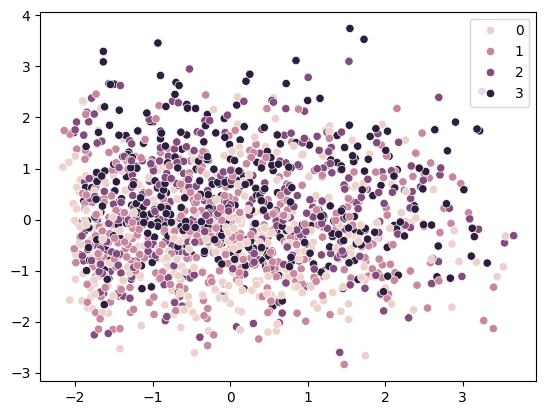

In [142]:
pca= PCA(n_components=2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
sns.scatterplot(x=x_train_trf[:,0],y=x_train_trf[:,1],hue=y_train)

# Conclusion

1. From EDA we can see that mid range and high mid range phones is offer good battery performance and expensive phones and mid range phone offer same specs in terms of front mega pixels camera but high mid range phones offer good front camera

2. There are some top features like Ram,battery_power,px_width,px_height,
  mobile_wt.

3. form all the above experiments we can conclude that Stacking  and logistic regression gave the good results

4. we chose Stacking Classifier  for deploying